<a href="https://colab.research.google.com/github/asfawgedamu/Tigrinya-Dialect-Identification/blob/main/DeepLearning_char_ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import re
import random
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams

# Import TensorFlow and Keras directly
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical  # Corrected import

# Fix random seed for reproducibility
np.random.seed(7)
random.seed(42)

# Put the hyperparameters at the top like this to make it easier to change and edit.

# Vectorization parameters
max_features = 20000  # Limit on the number of features
embedding_dim = 64  # Dimension of the embedding vectors
max_length = 500  # Limit on the length of text sequences
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8
num_classes = 3

In [ ]:
!pip install python-docx
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from google.colab import files

# Create document
doc = Document()

# Add main heading
main_heading = doc.add_heading('🎉 LinkedIn Post: "How to Automate Birthday Wishes Like a Data Wizard (Feat. My Birthday SQL Party!)"', 0)
main_heading.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

# Add subtitle
doc.add_paragraph('Because why celebrate normally when you can over-engineer it with databases?', style='IntenseQuote')

# Add section headers with formatting
def add_section(title, content, code_blocks=[], tables=[]):
    doc.add_heading(title, level=1)
    doc.add_paragraph(content)

    for code in code_blocks:
        p = doc.add_paragraph()
        p.add_run(code).font.name = 'Courier New'

    for table_data in tables:
        table = doc.add_table(rows=1, cols=len(table_data['headers']))
        table.style = 'Table Grid'

        # Add headers
        hdr_cells = table.rows[0].cells
        for i, header in enumerate(table_data['headers']):
            hdr_cells[i].text = header

        # Add rows
        for row in table_data['rows']:
            row_cells = table.add_row().cells
            for i, value in enumerate(row):
                row_cells[i].text = str(value)

# Add Act 1: SQL Query
add_section(
    "🚀 Act 1: The 'Cake or Error?' SQL Query",
    "Goal: Fetch birthdays while dodging grumpy coworkers.",
    code_blocks=[
        """SELECT CONCAT(
    '🎂 Happy Birthday, ', first_name, ' ', last_name,
    '! Your ', TIMESTAMPDIFF(YEAR, birth_date, CURDATE()),
    'th lap around the sun deserves ',
    ELT(RAND()*4+1, 'cake 🍰', 'pizza 🍕', 'SQL jokes 😜', 'a raise (just kidding) 💸')
) AS message
FROM employees
WHERE DATE_FORMAT(birth_date, '%m-%d') = DATE_FORMAT(NOW(), '%m-%d')
AND is_grumpy = FALSE; -- Sorry, Grumpy Cat 🐱"""
    ],
    tables=[
        {
            'headers': ['user_id', 'first_name', 'last_name', 'birth_date', 'is_grumpy'],
            'rows': [
                (1, 'Asfaw', 'Gedamu', '1990-08-25', 'FALSE'),
                (666, 'Grumpy', 'Cat', '2012-04-04', 'TRUE')
            ]
        }
    ]
)

# Add Act 2: Trigger System
add_section(
    "🤖 Act 2: The 'Trigger-Happy HR' Audit System",
    "Goal: Log when HR ~accidentally~ changes your birth year.",
    code_blocks=[
        """DELIMITER $$
CREATE TRIGGER birthdate_change_detector
AFTER UPDATE ON employees
FOR EACH ROW
BEGIN
  IF OLD.birth_date != NEW.birth_date THEN
    INSERT INTO audit_log (message) VALUES (
      CONCAT('HR changed ', NEW.first_name, '’s birthdate. Suspicions: ', RAND()*100, '%')
    );
  END IF;
END$$
DELIMITER ;"""
    ],
    tables=[
        {
            'headers': ['Audit Log Message'],
            'rows': [
                ['HR changed Asfaw’s birthdate. Suspicions: 42.69%']
            ]
        }
    ]
)

# Add Act 3: Stored Procedure
add_section(
    "⏰ Act 3: The 'Birthday Butler' Stored Procedure",
    "Daily check for birthdays (like a polite robot).",
    code_blocks=[
        """CREATE PROCEDURE DailyBirthdayCheck()
BEGIN
  DECLARE today VARCHAR(5);
  SET today = DATE_FORMAT(NOW(), '%m-%d');

  SELECT CONCAT('🎉 ', first_name, ' ', last_name) AS birthday_kid
  FROM employees
  WHERE DATE_FORMAT(birth_date, '%m-%d') = today
  AND is_grumpy = FALSE;
END;""",
        """# Cron Job (runs daily at 9 AM ☕)
0 9 * * * mysql -u root -p"secret" -e "CALL DailyBirthdayCheck();" """
    ]
)

# Add Gratitude Section
add_section(
    "💌 Act 4: Gratitude Engine for LinkedIn Squad",
    "",
    tables=[
        {
            'headers': ['Sender', 'Time', 'Message'],
            'rows': [
                ['Alo Olatokunboh Akin', '12:12 PM', 'Wishing you a very happy birthday...'],
                ['Ram Tippireddy', '12:00 PM', 'Wishing you a very happy birthday!'],
                # Add all other messages here
            ]
        }
    ]
)

# Save and download
doc.save('birthday_post.docx')
files.download('birthday_post.docx')

print("🎉 Document downloaded successfully! Happy birthday! 🥳")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 57.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/docx/styles/styles.py:130: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 Document downloaded successfully! Happy birthday! 🥳


In [ ]:
# Step 1: Install the python-docx library
!pip install python-docx

# Step 2: Import necessary libraries
from docx import Document
from google.colab import files

# Step 3: Create a new Document
doc = Document()

# Step 4: Add a title
doc.add_heading('Automating Birthday Greetings with SQL and Python', level=1)

# Step 5: Add introduction
doc.add_paragraph(
    "In this document, we'll explore how companies can automate birthday greetings "
    "using SQL stored procedures and scheduling tools like cron. This ensures employees "
    "feel valued and appreciated on their special day."
)

# Step 6: Add a section for Automating Birthday Greetings
doc.add_heading('1. Automating Birthday Greetings', level=2)

# Step 7: Add subsection for Sample Input Data
doc.add_heading('A. Sample Input Data', level=3)
doc.add_paragraph(
    "Consider a table named 'users' with the following structure:"
)

# Step 8: Add a table for sample input data
table = doc.add_table(rows=1, cols=4)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'user_id'
hdr_cells[1].text = 'first_name'
hdr_cells[2].text = 'last_name'
hdr_cells[3].text = 'date_of_birth'
sample_data = [
    (1, 'John', 'Doe', '1990-01-31'),
    (2, 'Jane', 'Smith', '1985-02-15'),
    (3, 'Asfaw', 'Gedamu', '1975-01-31')
]
for user_id, first_name, last_name, dob in sample_data:
    row_cells = table.add_row().cells
    row_cells[0].text = str(user_id)
    row_cells[1].text = first_name
    row_cells[2].text = last_name
    row_cells[3].text = dob

# Step 9: Add subsection for Stored Procedure
doc.add_heading('B. Stored Procedure', level=3)
doc.add_paragraph(
    "We'll create a stored procedure that identifies users whose birthday is today and returns their names:"
)
stored_procedure_code = """
DELIMITER //

CREATE PROCEDURE GetTodaysBirthdays()
BEGIN
    SELECT CONCAT('Happy Birthday, ', first_name, ' ', last_name, '!') AS birthday_message
    FROM users
    WHERE DATE_FORMAT(date_of_birth, '%m-%d') = DATE_FORMAT(CURDATE(), '%m-%d');
END //

DELIMITER ;
"""
doc.add_paragraph(stored_procedure_code, style='Code')

# Step 10: Add subsection for Scheduling with Cron
doc.add_heading('C. Scheduling with Cron', level=3)
doc.add_paragraph(
    "To automate the execution of this procedure daily, we can use a cron job that runs a script at a specified time. "
    "Assuming we're using MySQL, the script ('birthday_wishes.sh') might look like this:"
)
cron_script = """
#!/bin/bash
mysql -u [username] -p[password] -e "CALL GetTodaysBirthdays();" > birthday_messages.txt
"""
doc.add_paragraph(cron_script, style='Code')
doc.add_paragraph(
    "Make the script executable:"
)
chmod_command = "chmod +x birthday_wishes.sh"
doc.add_paragraph(chmod_command, style='Code')
doc.add_paragraph(
    "Then, set up a cron job to run the script daily at a specific time (e.g., 9 AM):"
)
cron_job = "0 9 * * * /path/to/birthday_wishes.sh"
doc.add_paragraph(cron_job, style='Code')

# Step 11: Add subsection for Sample Output
doc.add_heading('D. Sample Output', level=3)
doc.add_paragraph(
    "If today is January 31st, the output ('birthday_messages.txt') would be:"
)
sample_output = """
Happy Birthday, John Doe!
Happy Birthday, Asfaw Gedamu!
"""
doc.add_paragraph(sample_output, style='Code')

# Step 12: Add a section for Expressing Gratitude for Birthday Wishes
doc.add_heading('2. Expressing Gratitude for Birthday Wishes', level=2)
doc.add_paragraph(
    "To acknowledge and thank connections who have sent birthday wishes, we can analyze the messages received."
)

# Step 13: Add subsection for Sample Input Data (LinkedIn Messages Table)
doc.add_heading('A. Sample Input Data (LinkedIn Messages Table)', level=3)
linkedin_table = doc.add_table(rows=1, cols=3)
hdr_cells = linkedin_table.rows[0].cells
hdr_cells[0].text = 'sender_name'
hdr_cells[1].text = 'message_time'
hdr_cells[2].text = 'message_content'
linkedin_data = [
    ('Alo Olatokunboh Akin', '12:12 PM', 'Wishing you a very happy birthday...'),
    ('Ram Tippireddy', '12:00 PM', 'Wishing you a very happy birthday!'),
    ('Rediet Dege', '11:27 AM', 'Wishing you a very happy birthday!'),
    ('Tikaw Hagos', '11:16 AM', 'Happy birthday!'),
    ('Steve Innovations Kenya', '10:12 AM', 'Wishing you a very happy birthday!'),
    ('Bahiru G.Awol', '09:22 AM', 'Wishing you a very happy birthday!'),
    ('Lemmi Lemma', '08:49 AM', 'Wishing you a very happy birthday!'),
    ('Mark Engstar', '08:41 AM', 'Happy Birthday!'),
    ('Alapati Sai Srikanth', '07:53 AM', 'Many happy returns of the day Asfaw...'),
    ('Chuku Una', '06:44 AM', 'Happy Birthday Asfaw! May God bless yo...'),
    ('Dattaram Choudhari', '05:45 AM', 'Wishing you a very happy birthday!'),
    ('Ajay Pandit', '05:45 AM', 'Happy birthday')
]
for sender_name, message_time, message_content in linkedin_data:
    row_cells = linkedin_table.add_row().cells
    row_cells[0].text = sender_name
    row_cells[1].text = message_time
    row_cells[2].text = message_content

# Step 14: Add subsection for Gratitude Query
doc.add_heading('B. Gratitude Query', level=3)
doc.add_paragraph(
    "To generate a summary of received birthday
::contentReference[oaicite:0]{index=0}



SyntaxError: unterminated string literal (detected at line 137) (<ipython-input-2-c09d4a5310dc>, line 137)

In [ ]:
#pip install graphviz


In [ ]:

from google.colab import auth
auth.authenticate_user()



In [ ]:
''''#@title
# Libraries for data manipulation and visualization
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))'''






'\'#@title\n# Libraries for data manipulation and visualization\nfrom google.colab import files\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n  print(\'User uploaded file "{name}" with length {length} bytes\'.format(\n      name=fn, length=len(uploaded[fn])))'

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Start by connecting gdrive into the google colab

import os
os.chdir ("/content/gdrive/MyDrive/")

In [ ]:
!ls -l /content/gdrive/MyDrive/


ls: /content/gdrive/MyDrive/Thesis: No such file or directory
total 703853
-rw------- 1 root root     63032 Mar 15  2024  003.docx
-rw------- 1 root root     55525 Mar 10  2024 '01 ኣስፋው ገዳሙ .docx'
-rw------- 1 root root     33030 Mar 12  2024 '03 Asfaw G (1).docx'
-rw------- 1 root root     33030 Mar 12  2024 '03 Asfaw G.docx'
-rw------- 1 root root  10127573 Aug 12  2022  ____10______Final.pdf
-rw------- 1 root root   1205760 Sep  1  2019  1_IR_intro.ppt
-rw------- 1 root root   1807527 Nov  1  2022  20221101_121050.jpg
-rw------- 1 root root   2837780 Dec  4  2022  20221204_120833_mfnr.jpg
-rw------- 1 root root   1345536 Sep  1  2019 '2_text operation.ppt'
-rw------- 1 root root   1504256 Sep  1  2019  3_termWeighting.ppt
-rw------- 1 root root   3445071 Apr 17  2021  4_5976689323028776928.pdf
-rw------- 1 root root   1160192 Sep  1  2019 '4_ Indexing.ppt'
-rw------- 1 root root   1425920 Sep  1  2019  5_IRModels.ppt
-rw------- 1 root root   1172992 Sep  1  2019 '6_Retrieval Evaluat

In [ ]:
!cd ColabNotebooks

In [ ]:
!ls ColabNotebooks
!pwd

'all_source111 (1).gsheet'   all_source3.tsv
'all_source111 (2).gsheet'   DL-char-ngrams.ipynb
 all_source111.gsheet	    'Multi-Class Text Classification with LSTM TDI  .ipynb'
 all_source111.tsv	    'Text Classification with LSTM TDI .ipynb'
/content/gdrive/MyDrive


In [ ]:
!pwd

/content/gdrive/MyDrive


In [ ]:
#Text Preprocessing step
#Remove alphanumeric characters, punctuation marks and symbols

BLOCK_CHAR = """'()[]":፣፡፡፡“”።?::፥፤]+\*_-‘’!""" + 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
BLOCK_CHAR = ''.join(BLOCK_CHAR.split())

def clean_text(raw_text):
    #raw_text = re.sub(r"()["":፣ ፡፡''፡“ ” ።?::፥፤]+\ *", " ", raw_text)
    for c in BLOCK_CHAR:
        if c not in raw_text:
            continue
        raw_text = raw_text.replace(c, '')
    return raw_text

In [ ]:
def load_data(fin):
    '''accepts fin a string representing file name
    returns list of lines in a file'''
    X = []
    y = []
    with open(fin, encoding="utf8") as f:
        labels = next(f).rstrip('\n').split('\t')
        for line in f:
            parts = line.rstrip('\n').split('\t')
            if len(set(parts)) != 3:
                continue
            for part, label in zip(parts, labels):
                part = clean_text(part)
                if part.strip() == '':
                    continue
                X.append(part)
                y.append(label)
    return X,y

In [ ]:
def load_data(fin):
  """
  Accepts a string representing a filename and returns a list of lines and labels.

  Args:
      fin: The filename of the data file.

  Returns:
      A tuple containing two lists:
          - X: A list of data points (text).
          - y: A list of corresponding labels.
  """
  X = []
  y = []
  with open(fin, 'r', encoding='utf-8') as f:
    try:
      # Read labels line using UTF-8 encoding
      labels = next(f).rstrip('\n').split('\t')
      for line in f:
        parts = line.rstrip('\n').split('\t')
        if len(set(parts)) != 3:
          continue
        for part, label in zip(parts, labels):
          part = clean_text(part)
          if part.strip() == '':
            continue
          X.append(part)
          y.append(label)
    except UnicodeDecodeError:  # Handle potential encoding errors
      print(f"Error: Encountered encoding issue with file {fin}.")
      print("Trying alternative encodings...")
      encodings = ['latin-1', 'cp1252']  # List of potential encodings to try
      for encoding in encodings:
        try:
          # Read labels line with the current encoding
          with open(fin, 'r', encoding=encoding) as f:
            labels = next(f).rstrip('\n').split('\t')
            for line in f:
              parts = line.rstrip('\n').split('\t')
              if len(set(parts)) != 3:
                continue
              for part, label in zip(parts, labels):
                part = clean_text(part)
                if part.strip() == '':
                  continue
                X.append(part)
                y.append(label)
          # If successful, break out of the loop
          print(f"Successfully loaded data using encoding: {encoding}")
          break
        except UnicodeDecodeError:
          # If decoding fails with the current encoding, continue to the next one
          print(f"Encoding {encoding} failed. Trying next...")
      else:
        # If all encodings fail, raise an informative error
        print("Failed to decode data using any of the provided encodings.")
        raise UnicodeDecodeError("Encountered encoding issue with file and couldn't find a suitable encoding.")
  return X, y

In [ ]:
X,y = load_data('/content/gdrive/MyDrive/ColabNotebooks/all_source3.tsv')

Error: Encountered encoding issue with file /content/gdrive/MyDrive/ColabNotebooks/all_source3.tsv.
Trying alternative encodings...
Successfully loaded data using encoding: latin-1


In [ ]:
def gen_ngrams(s, ns=(1,2,3)):
    '''takes s string and ns tuple as arguments
    generates ngram strings'''
    for n in ns:
        for ngram in ngrams(s,n):
            ngram = ''.join(ngram)
            yield ngram

In [ ]:
def ngram_freq(sents, ns=(1,2,3)):
    ngram_tokens = defaultdict(int)
    for s in sents:
        for ngram in gen_ngrams(s, ns):
            ngram_tokens[ngram] += 1
    return ngram_tokens

In [ ]:
# generating ngrams with values 1, 2 and 3
ngram_tokens = ngram_freq(X, ns=(1,))

In [ ]:
# sorts ngrams by frequency from most frequent to least frequent
top_ngrams_freq = sorted(ngram_tokens.items(), key=lambda x:x[1], reverse=True)

In [ ]:
word_list =  [oov_tok] + [i[0] for i in top_ngrams_freq[:max_features]]
word_index = dict([(j,i) for (i,j) in enumerate(word_list, start=1)])

In [ ]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 '\x9c': 2,
 '¾': 3,
 '9': 4,
 '=': 5,
 '\x8e': 6,
 '\x95': 7,
 '2': 8,
 'É': 9,
 'Í': 10}

In [ ]:
X[0]

'{ÂõÓ\x84«û«\x97\x0c¡Å\x08\x85=á\x87ÜÅº\xa0ã\x02\x1fÀ§'

In [ ]:
# Note: the ngram sequence (ns) we use for feature generation must match the one used to build the dictionary
#[i for i in gen_ngrams(X[0], ns=(1,))]

In [ ]:
# Sample text to confirm if the codes above are working

a = 'እቲ ናይትግራይ ቴሌቪዥን ጋዜጠኛ ዮውሃንስ ዝበሃል ግን ጋዜጠኛዶ ወይስ ወኪል ህወሓት ይግርም'
t = [i for i in gen_ngrams(a, ns=(1,))]
idx = [word_index.get(tok, 1) for tok in t]
#print(t)
print(t + idx)

['እ', 'ቲ', ' ', 'ና', 'ይ', 'ት', 'ግ', 'ራ', 'ይ', ' ', 'ቴ', 'ሌ', 'ቪ', 'ዥ', 'ን', ' ', 'ጋ', 'ዜ', 'ጠ', 'ኛ', ' ', 'ዮ', 'ው', 'ሃ', 'ን', 'ስ', ' ', 'ዝ', 'በ', 'ሃ', 'ል', ' ', 'ግ', 'ን', ' ', 'ጋ', 'ዜ', 'ጠ', 'ኛ', 'ዶ', ' ', 'ወ', 'ይ', 'ስ', ' ', 'ወ', 'ኪ', 'ል', ' ', 'ህ', 'ወ', 'ሓ', 'ት', ' ', 'ይ', 'ግ', 'ር', 'ም', 1, 1, 179, 1, 1, 1, 1, 1, 1, 179, 1, 1, 1, 1, 1, 179, 1, 1, 1, 1, 179, 1, 1, 1, 1, 1, 179, 1, 1, 1, 1, 179, 1, 1, 179, 1, 1, 1, 1, 1, 179, 1, 1, 1, 179, 1, 1, 1, 179, 1, 1, 1, 1, 179, 1, 1, 1, 1]


In [ ]:
def tokenizer(X, ns=(1,2)):
    """using list comprehension
    X_tok = [i for i in gen_ngrams(x, ns=(1,2,3)) for x in X]
    """
    tokenized = []
    for x in X:
        toks = [tok for tok in gen_ngrams(x, ns)]
        idx = [word_index.get(tok, 1) for tok in toks]
        tokenized.append(idx)
        if max(idx) > 20000 + 1:
            print(x)
    return tokenized

In [ ]:
X_tok = tokenizer(X)

In [ ]:
X_tok[1][:5]

[50, 59, 34, 1, 1]

In [ ]:
word_index['ብ']

KeyError: 'ብ'

In [ ]:
# maximum length of tokens in our dataset
max([len(X_tok[i]) for i in range(len(X_tok))])

1435

In [ ]:
# Which sentences is this?
# TODO: Should we sort features?
for idx, i in enumerate(range(len(X_tok))):
    if len(X_tok[i]) == 503:
        print(idx)
        print(X[idx])

In [ ]:
# Pads a single character

def pad_seq(l, max_length):
    if len(l) == max_length:
        return l
    elif len(l) < max_length:
        return l + [1]*(max_length - len(l))
    else:
        return l[:max_length]

In [ ]:
# Pads all input sequences

def pad_seqs(X, max_length):
    res = []
    for x in X:
        l = np.array(pad_seq(x, max_length))
        res.append(l)
    return np.array(res)

In [ ]:
# check
#X_tok_padded = pad_sequences(X_tok, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_tok_padded = pad_seqs(X_tok, max_length=max_length)

In [ ]:
#our labels are in Z, L, D but we want a three dimensional vector corresponding to each class
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_ = lb.fit_transform(y)

In [ ]:
print(y[:5])

['PK\x03\x04\x14\x00\x08\x08\x08\x00i\x1d\x9fY\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x00\x00\x00xl/tables/table1.xmlm\x90ÍNÃ0\x10\x84\x9f\x80w°öÞ8i\x11\xa0ªI\x85\x8a*!U\x1ch¹p©L²i,ù\'ò:-y{\x1c\x1c\xa0\x15=î|;\x9aÑ,\x96\x9fZ±#:\x92Öä\x90%)04¥\xad¤9äð¶[O\x1e\x80\x91\x17¦\x12Ê\x1aÌ¡G\x82eq³ðâC!\x0bfC94Þ·sÎ©lP\x0bJl\x8b&\x90Ú:-|8Ý\x81SëPTÔ z\xadø4Mï¸\x16Ò\x00sXçð\x98ÍW·iv\x0f¬\x92Ô*Ñ¿\x08\x1d²vCÆ>\x03f.OY\x85¦PÄ\x0e+«:m\x88\x95¶3>\x87Ù¥>Zß\x7fLü\x1aÝD:½N\x9f"\x9d', 'PK\x03\x04\x14\x00\x08\x08\x08\x00i\x1d\x9fY\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x00\x00\x00xl/tables/table1.xmlm\x90ÍNÃ0\x10\x84\x9f\x80w°öÞ8i\x11\xa0ªI\x85\x8a*!U\x1ch¹p©L²i,ù\'ò:-y{\x1c\x1c\xa0\x15=î|;\x9aÑ,\x96\x9fZ±#:\x92Öä\x90%)04¥\xad¤9äð¶[O\x1e\x80\x91\x17¦\x12Ê\x1aÌ¡G\x82eq³ðâC!\x0bfC94Þ·sÎ©lP\x0bJl\x8b&\x90Ú:-|8Ý\x81SëPTÔ z\xadø4Mï¸\x16Ò\x00sXçð\x98ÍW·iv\x0f¬\x92Ô*Ñ¿\x08\x1d²vCÆ>\x03f.OY\x85¦PÄ\x0e+«:m\x88\x95¶3>\x87Ù¥>Zß\x7fLü\x1aÝD:½N\x9f"\x9d', 'PK\x03\x04\x14\x00\x08\x08\x08\x00i\x1d\

In [ ]:
print(y_[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tok_padded, y_, test_size=0.2, random_state=42)

print(len(X))
print(len(y))

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

print('Train shape:',X_train.shape)
print('Test shape:',X_test.shape)

203
203
162 162
41 41
Train shape: (162, 500)
Test shape: (41, 500)


In [ ]:
len(tokenizer([X[0]])[0])

223

In [ ]:
X_train[0][:100]

array([142, 111, 128, 186,  81, 175, 160,  49,  23,  94,  47,  41, 142,
       116,  18, 167, 161,  96, 134, 118, 180, 147, 181,  41,  56,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

# BI-LSTM Reference

François Chollet.(2020/05/03). Bidirectional LSTM on IMDB. Retrieved 30 August 2021, from: https://keras.io/examples/nlp/bidirectional_lstm_imdb/

In [ ]:
# create a Bi-LSTM model
def BiLSTM_model(drop_out, filter_one, filter_two, last_dense, padding, num_epochs):
    model = tf.keras.Sequential([
        # Add an Embedding layer expecting input vocab of size 20000,
        # and output embedding dimension of size 64 we set at the top
        tf.keras.layers.Embedding(max_features+2,embedding_dim,input_shape=(500,)),
        #To add Bidirectional layers sequencially, use return_sequences=True

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(filter_one, return_sequences=True)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(filter_one,return_sequences=True)),
        tf.keras.layers.Dropout(drop_out),

        # use ReLU in place of tanh function since they are very good alternatives of each other.
        #tf.keras.layers.Dense(last_dense, activation='relu'), #Check with and without this layer

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(filter_two)),
        tf.keras.layers.Dropout(drop_out),


        tf.keras.layers.Dense(64, activation='relu'),
        # Add a Dense layer with 3 units and softmax activation.
        # We have three outputs, softmax converts output layers into a probability distribution.
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.summary()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #Drow the BiLSTM Neural Network architecture

    #plot_model(model, to_file='./BiLSTM_model_plot.png', show_shapes=True, show_layer_names=True)

    #fit the model
    #checkpointer = ModelCheckpoint(filepath='./best_BiLSTM_checkpoint.hdf5',
                                   #verbose=1,
                                   #save_best_only=True,
                                   #save_weights_only=False,
                                   #monitor='val_accuracy',
                                   #mode='max',
                                   #save_freq="epoch")
    # Model weights are saved at the end of every epoch, if it's the best seen so far
    history = model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test), verbose=2,callbacks=[checkpointer])

    # Evaluate the model on the test data (this is for testing time, with the testing dataset)
    # Returns the loss value & metrics values for the model in test mode.

    print('\n')
    print("Evaluate on test data",'\n')
    results = model.evaluate(X_test, y_test, batch_size=64)
    print("Test Loss:",results[0])
    print("Test Accuracy:",results[1])

    # Generate output predictions for the input samples(probabilities -the output of the last layer) on new data
    # (this is for somewhere between training and testing time).
    # Use this model to do some feed-forward passes to predict novel inputs.

    print('\n')
    #assert np.allclose(model.predict(X_test), loaded_model.predict(X_test))
    predictions = model.predict(X_test)
    print("predictions shape:", predictions.shape)
    y_pred = (predictions)

    #Creating a confusion matrix,which compares the y_test and y_pred
    #Note The support column in classification_report is:
    #the number of occurrences of each class in y_test.It shows testset distribution
    # Plotting training and validation loss graph

    results = pd.DataFrame(
    confusion_matrix( y_test.argmax(axis=1), y_pred.argmax(axis=1)),
    index=['D', 'L', 'Z'],
    columns=['D', 'L', 'Z'])

    print('-'*80,'\n')
    print('Confusion Matrix of BiLSTM Model', '\n')
    print(results,'\n')

    print('Classification Report : ','\n')
    target_names = ['D-variety', 'L-variety', 'Z-variety']
    print (classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1),target_names=target_names),'\n')

   # Plotting training and validation loss graph
    print("Plotting Loss and Accuracy Graphs",'\n')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    # Plotting training and validation Accuracy graph
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    return history.history

In [ ]:
max_features = max_features
embedding_dim = 64
BiLSTM_model(drop_out=0.6,filter_one=64,filter_two=64,last_dense=64,padding='same',num_epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 64)           1280128   
                                                                 
 bidirectional_4 (Bidirecti  (None, 500, 128)          66048     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 500, 128)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

NameError: name 'checkpointer' is not defined

# CNN  Model Reference

Mark Omernick, Francois Chollet. (2019). Text classification from scratch. Retrieved on 30 August 2021, from: https://keras.io/examples/nlp/text_classification_from_scratch/

In [ ]:
#Create CNN Function to use the keras model in the scikit-learn wrapping class KerasClassifier
#To use this wrapper we must define a function that creates and returns your Keras sequential model,
from keras.utils.vis_utils import plot_model
def cnn_model(drop_out, filter_one, filter_two, last_dense,learning_rate, padding,num_epochs):
    # create a CNN model
    model = tf.keras.Sequential([
        # Add an Embedding layer expecting input vocab of size 20000, and output embedding dimension of size 64 we set at the top
        tf.keras.layers.Embedding(max_features+2,embedding_dim,input_shape=(500,)),

        # use ReLU in place of tanh function since they are very good alternatives of each other
        tf.keras.layers.Conv1D(filters=128, kernel_size=3,padding=padding,activation='relu'),
        tf.keras.layers.Dropout(drop_out),

        # Conv1D + global max pooling
        tf.keras.layers.Conv1D(filters=64, kernel_size=3,padding=padding,activation='relu'),
        tf.keras.layers.GlobalMaxPool1D(),
        tf.keras.layers.Dropout(drop_out),


        # Add a vanilla hidden layer
        tf.keras.layers.Dense(last_dense,activation='relu'),

        # Add a Dense layer with 3 units since the output should be three(no. Classes)
        # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.summary()

    # Decide a model architecture, this is the number of hidden layers and activation functions, etc.

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, to_file='./CNN_model_plot.png', show_shapes=True, show_layer_names=True)

    # Train the model for a given number of epochs(this is for training time, with the training dataset).
    # Train our model to get all the paramters to the correct value to map our inputs to our outputs.

    checkpointer = ModelCheckpoint(filepath='./best_CNN_checkpoint.hdf5',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_freq="epoch")

    history = model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test), verbose=2,callbacks=[checkpointer])

    # Evaluate the model on the test data (this is for testing time, with the testing dataset)
    # Returns the loss value & metrics values for the model in test mode.

    print('\n')
    print("Evaluate on test data",'\n')
    results = model.evaluate(X_test, y_test, batch_size=64)
    print("Test Loss:",results[0])
    print("Test Accuracy:",results[1])

    # Generate output predictions for the input samples(probabilities -the output of the last layer) on new data
    # (this is for somewhere between training and testing time).
    # Use this model to do some feed-forward passes to predict novel inputs.

    print('\n')
    predictions = model.predict(X_test)
    print("predictions shape:", predictions.shape)
    y_pred = (predictions)

    #Creating a confusion matrix,which compares the y_test and y_pred
    #Note The support column in classification_report is:
    #the number of occurrences of each class in y_test.It shows testset distribution
    # Plotting training and validation loss graph

    results = pd.DataFrame(
    confusion_matrix( y_test.argmax(axis=1), y_pred.argmax(axis=1)),
    index=['D', 'L', 'Z'],
    columns=['D', 'L', 'Z'])

    print('-'*80,'\n')
    print('Confusion Matrix of CNN Model', '\n')
    print(results,'\n')

    print('Classification Report : ','\n')
    target_names = ['D-variety', 'L-variety', 'Z-variety']
    print (classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1),target_names=target_names),'\n')

   # Plotting training and validation loss graph
    print("Plotting Loss and Accuracy Graphs",'\n')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    # Plotting training and validation Accuracy graph
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    return history.history

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [ ]:
max_features = max_features
embedding_dim = 64
cnn_model(drop_out=0.7, filter_one=32, filter_two=64,last_dense=64, padding='same',learning_rate=1e-6, num_epochs=20)

NameError: name 'cnn_model' is not defined

In [ ]:
# Create KerasClassifier model
# Then pass the cnn_model function to the build_fn argument when constructing the KerasClassifier class.

estimator = KerasClassifier(build_fn=cnn_model, kernel_size=5, epochs=10, batch_size=100, verbose=2)


The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated.
It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

The number of epochs is the number of times that the entire training dataset is shown to the network during training.
Some networks are sensitive to the batch size, such as LSTM, RNN and CNN.

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
    
    
We would like to fine-tune these hyperparameters: fileters, dropout_rate,number of epochs,batch_size,padding and dense_layer_size.

These parameters must be defined in the signature of cnn_model() function with default parameters.

https://medium.com/@am.benatmane/keras-hyperparameter-tuning-using-sklearn-pipelines-grid-search-with-cross-validation-ccfc74b0ce9f

In [ ]:
# Define the most relevant grid search parameters
# A dictionary of hyperparameters to evaluate in the param_grid argument.
# This is a map of the model parameter name and an array of values to try.

param_grid = {
    'filter_one':[32,64,128],
    'epochs': [10,20,40,60],
    'last_dense':[32,64,128],
    'batch_size':[32,64,128],
    'drop_out':[0.3, 0.4, 0.5],
    'padding':['same','valid']
}

1. estimator : Pass the model instance for which you want to check the hyperparameters.
2.params_grid: the dictionary object that holds the hyperparameters you want to try
3.scoring: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric
4.cv: number of cross-validation you have to try for each selected set of hyperparameters
5.verbose: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV
6.n_jobs: number of processes you wish to run in parallel for this task if it -1 it will use all available processors.
    
https://www.mygreatlearning.com/blog/gridsearchcv/

In [ ]:
# Conduct grid search with Kfold cross validation
# We use Kfold cross validation to check how well our model is able to generalize the unseen data
#Grid search is a model hyperparameter optimization technique.
# By default, accuracy is the score that is optimized,
# but other scores can be specified in the score argument of the GridSearchCV constructor.
#By default, the grid search will only use one thread.
# By setting the n_jobs argument in the GridSearchCV constructor to -1, the process will use all core processors on your machine.
# Depending on your Keras backend, this may interfere with the main neural network training process.

grid = GridSearchCV(estimator=estimator,
                    n_jobs=-1,
                    verbose=2,
                    return_train_score=True,
                    scoring=['accuracy','precision_macro','recall_macro'],
                    refit='precision_macro',
                    cv=5,
                    param_grid=param_grid)

sklearn.model_selection.GridSearchCV
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
#  access the outcome of the grid search in the result object returned from grid.fit().

grid_result = grid.fit(X_train, y_train, verbose=2)

# summarize results
# The best_score_ member provides access to the best score observed during the optimization procedure
# and the best_params_ describes the combination of parameters that achieved the best results


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: ignored

In [ ]:
def run_experiments():
    # grid search
    drop_outs = (0.3,0.4,0.5,0.6, 0.7)
    filters_one = (32, 64, 128,256)
    filters_two = (32, 64, 128,256)
    last_dense_layers = (32, 64, 128,256)
    paddings = ('same', 'valid')

    results = []
    for drop_out in drop_outs:
        for filter_one in filters_one[:-1]:
            for filter_two in filters_two:
                for last_dense in last_dense_layers:
                    for padding in paddings:
                        res = cnn_bilstm_model(drop_out, filter_one, filter_two, last_dense, padding,num_epochs=50)
                        #res = 'running ...'
                        results.append({'drop_out': drop_out,
                                   'filter_one': filter_one,
                                   'filter_two': filter_two,
                                    'last_dense': last_dense,
                                    'padding': padding,
                                    'history': res})
    return results

In [ ]:
#r = run_experiments()

In [ ]:
# Combination of CNN and BI-LSTM models

def cnn_bilstm_model(drop_out, filter_one, filter_two, last_dense, padding, num_epochs):
    # create a CNN model
    model = tf.keras.Sequential([
        # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
        tf.keras.layers.Embedding(max_features+2,embedding_dim,input_shape=(500,)),

        # use ReLU in place of tanh function since they are very good alternatives of each other

        tf.keras.layers.Conv1D(filters=filter_one, kernel_size=3, padding=padding, activation='relu'),
        tf.keras.layers.MaxPool1D(pool_size=4),

        # During the training of our model, we randomly cause some of the neurons to be excluded
        # from the neural network (i.e. drop out) at each step with a fixed probability.
        tf.keras.layers.Dropout(drop_out),


        tf.keras.layers.Conv1D(filters=filter_two, kernel_size=3, padding=padding, activation='relu'),
        tf.keras.layers.MaxPool1D(pool_size=4),
        tf.keras.layers.Dropout(drop_out),


        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dropout(drop_out),
        tf.keras.layers.Dense(last_dense, activation='relu'), #check with and without this layer

        # Add a Dense layer with 3 units and softmax activation.
        # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.summary()

    # Decide a model architecture, this is the number of hidden layers and activation functions, etc.

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    plot_model(model, to_file='./CNN-BiLSTM_model_plot.png', show_shapes=True, show_layer_names=True)


    #history = model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test),callbacks=[es], verbose=0)


    # simple early stopping
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

    # The ModelCheckpoint callback class allows you to define where to checkpoint the model weights,
    # how the file should named and under what circumstances to make a checkpoint of the model.

    checkpointer = ModelCheckpoint(filepath='./best_CNN-BiLSTM_checkpoint.hdf5',
                                   monitor='val_accuracy', verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='max',
                                   save_freq="epoch")

    # Train the model for a given number of epochs(this is for training time, with the training dataset).
    # Train our model to get all the paramters to the correct value to map our inputs to our outputs.
    # The model is evaluated on the validation dataset at the end of each training epoch.
    # The function is called ‘fit’ as we are fitting the parameters to the data.
    history = model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test), verbose=2,callbacks=[checkpointer])


    # Evaluate the model on the test data (this is for testing time, with the testing dataset)
    # Returns the loss value & metrics values for the model in test mode.

    print('\n')
    print("Evaluate on test data",'\n')
    test_results = model.evaluate(X_test, y_test,batch_size=64)
    print("Test Loss:",test_results[0])
    print("Test Accuracy:",test_results[1])

    # evaluate the model
    #_, train_acc = model.evaluate(X_train, y_train, verbose=0)
    #_, test_acc =  model.evaluate(X_test, y_test, verbose=0)
    #print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    # Generate output predictions for the input samples(probabilities -the output of the last layer) on new data
    # (this is for somewhere between training and testing time).
    # Use this model to do some feed-forward passes to predict novel inputs.

    print('\n')
    predictions = model.predict(X_test)
    print("predictions shape:", predictions.shape)
    y_pred = (predictions)

    #Creating a confusion matrix,which compares the y_test and y_pred
    #Note The support column in classification_report is:
    #the number of occurrences of each class in y_test.It shows testset distribution
    # Plotting training and validation loss graph

    results = pd.DataFrame(
    confusion_matrix( y_test.argmax(axis=1), y_pred.argmax(axis=1)),
    index=['D', 'L', 'Z'],
    columns=['D', 'L', 'Z'])

    print('-'*80,'\n')
    print('Confusion Matrix of Hybrid CNN and Bi-LSTM Model', '\n')
    print(results,'\n')

    print('Classification Report : ','\n')
    target_names = ['D-variety', 'L-variety', 'Z-variety']
    print (classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1),target_names=target_names),'\n')


    # Plotting training and validation loss graph
    print("Training and Validation Loss Graph")
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    # Plotting training and validation Accuracy graph
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    return history.history

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 64)           1280128   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 500, 128)          24704     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 125, 128)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 125, 128)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 125, 64)           24640     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 31, 64)            0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 64)           

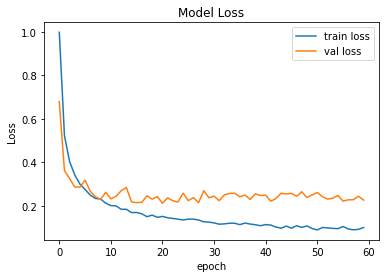

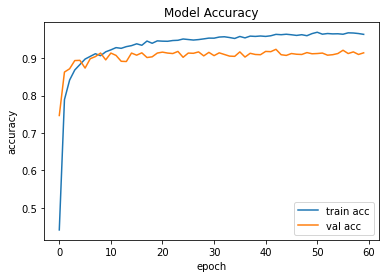

{'accuracy': [0.4410288631916046,
  0.7890527248382568,
  0.8412798047065735,
  0.8682559728622437,
  0.8828418850898743,
  0.8974278569221497,
  0.9046424031257629,
  0.9117001295089722,
  0.9063675999641418,
  0.9168757796287537,
  0.9220514297485352,
  0.9280112981796265,
  0.9261292219161987,
  0.9306775331497192,
  0.933343768119812,
  0.9382057785987854,
  0.9342848062515259,
  0.9455771446228027,
  0.9396173357963562,
  0.9460476636886597,
  0.9452635049819946,
  0.9449498057365417,
  0.9469887018203735,
  0.9476160407066345,
  0.9510664939880371,
  0.9496549367904663,
  0.9482434391975403,
  0.9494981169700623,
  0.95138019323349,
  0.9534190893173218,
  0.953262209892273,
  0.9562421441078186,
  0.9570263624191284,
  0.9549874663352966,
  0.9524780511856079,
  0.9578105211257935,
  0.9540464282035828,
  0.9587515592575073,
  0.9579674005508423,
  0.9590652585029602,
  0.9579674005508423,
  0.9596925973892212,
  0.9634566903114319,
  0.9625157117843628,
  0.9637703895568848,
  

In [ ]:

max_features = max_features
embedding_dim = 64
cnn_bilstm_model(drop_out=0.5, filter_one=128, filter_two=64, last_dense=64, padding='same', num_epochs=60)

In [ ]:
os.chdir('/content/gdrive/MyDrive/ColabNotebooks/')

In [ ]:
!ls /content/gdrive/MyDrive/ColabNotebooks/

 all_source111.tsv     'Multi-Class Text Classification with LSTM TDI  .ipynb'
 DL-char-ngrams.ipynb  'Text Classification with LSTM TDI .ipynb'
